# MSFT
Microsoft Corporation is an American multinational technology corporation that produces computer software, consumer electronics, personal computers, and related services. It is best known for its software products like the Windows operating system and the Microsoft Office suite.


## Settings

In [1]:
# Root Settings
import sys
from pathlib import Path

# Add project root to path
sys.path.append(str(Path().resolve().parent))

# Load basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Custom functions using sec-edgar-api and yfinance
from finance import (
    get_facts,
    annual_net_income, plot_annual_net_income, plot_net_income_growth,
    annual_dividends, plot_annual_dividends, plot_dividends_growth,
    historical_price
)

# Style settings
plt.style.use('ggplot')
plt.rc('axes', unicode_minus=False)
plt.rcParams.update({
    'axes.titlesize': 20,       # Plot titles
    'axes.labelsize': 16,       # X/Y axis labels
    'xtick.labelsize': 14,      # X-axis tick labels
    'ytick.labelsize': 16,      # Y-axis tick labels
    'legend.fontsize': 12,      # Legend (if used)
    'figure.titlesize': 22,     # Main figure title (if used)
})

## Company Information

In [2]:
ticker = 'MSFT'
facts = get_facts(ticker=ticker)

## Income

Microsoft earns a lot. A LOT. Annual net income in 2024 is around 90 billion dollars which is a lot of money. 

Not just MSFT earns money, but they are earning more and more. In the last 5 years, net income has grown at a rate of 14.5% per year. You don't expect a company of this size to grow at such a rate.

In [3]:
df_net_income = annual_net_income(facts)
df_net_income[0].tail(5)

,date,net_income,year
12,2020-06-30,44281000000,2020
13,2021-06-30,61271000000,2021
14,2022-06-30,72738000000,2022
15,2023-06-30,72361000000,2023
16,2024-06-30,88136000000,2024


## Income Growth (%)

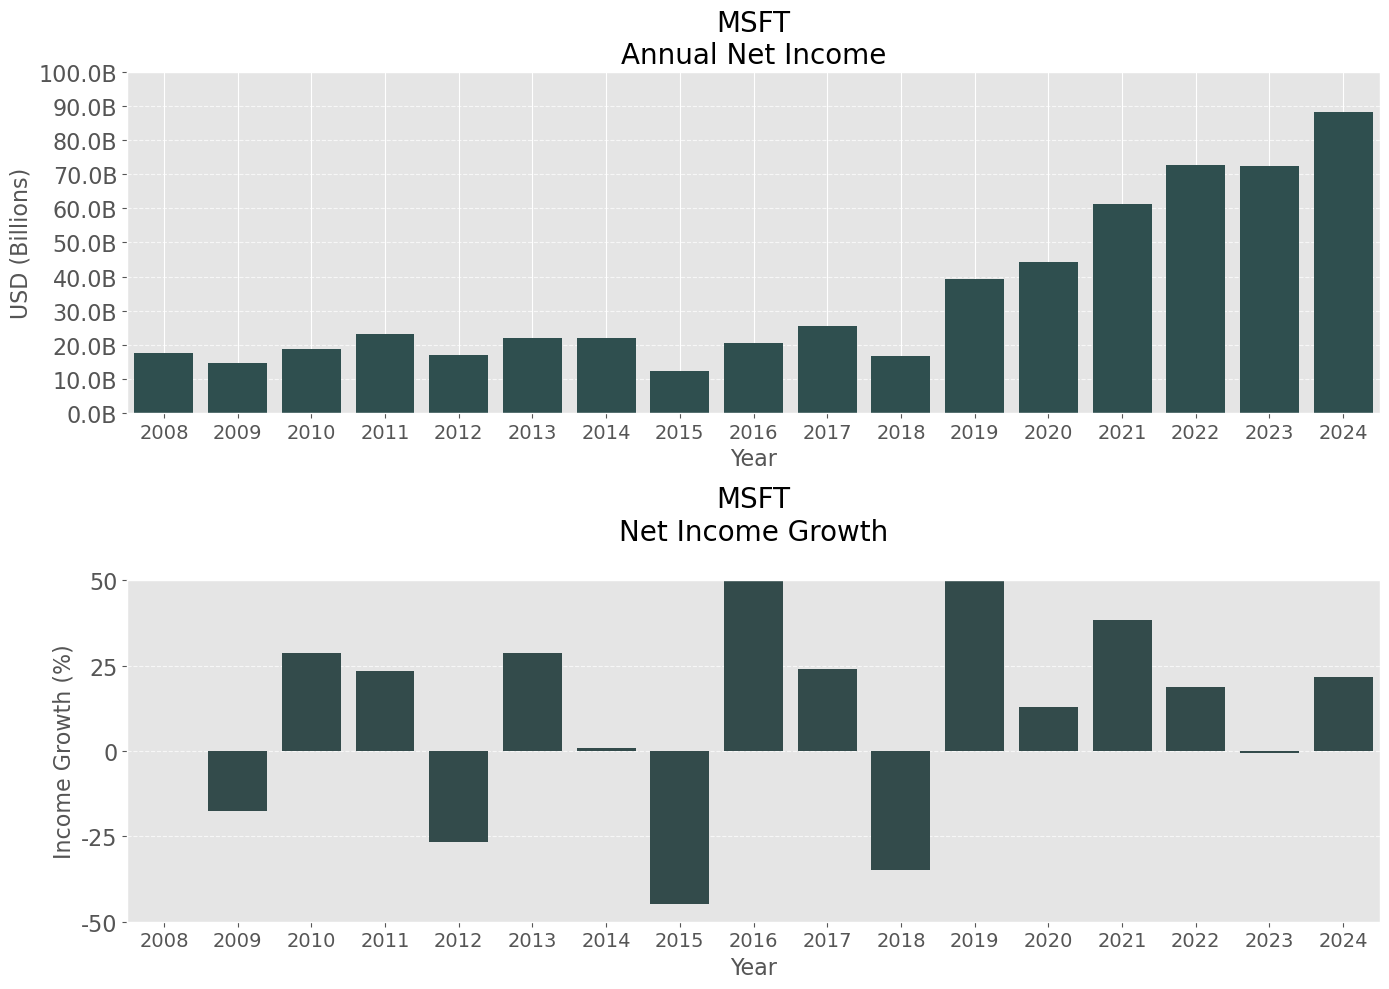

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_net_income(df_net_income[0], ticker=ticker, unit='B', ystep=10e9, ax=axes[0])
plot_net_income_growth(df_net_income[0], ticker=ticker, ymin=-50, ymax=50, ystep=25, ax=axes[1])

# Show x-ticks on upper graph too
axes[0].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

## Price

Stock price of Microsoft has increased steadily over the years. In 2009 (Riemann) and 2022, the stock price dropped significantly, but the stock price recovered quickly.  

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


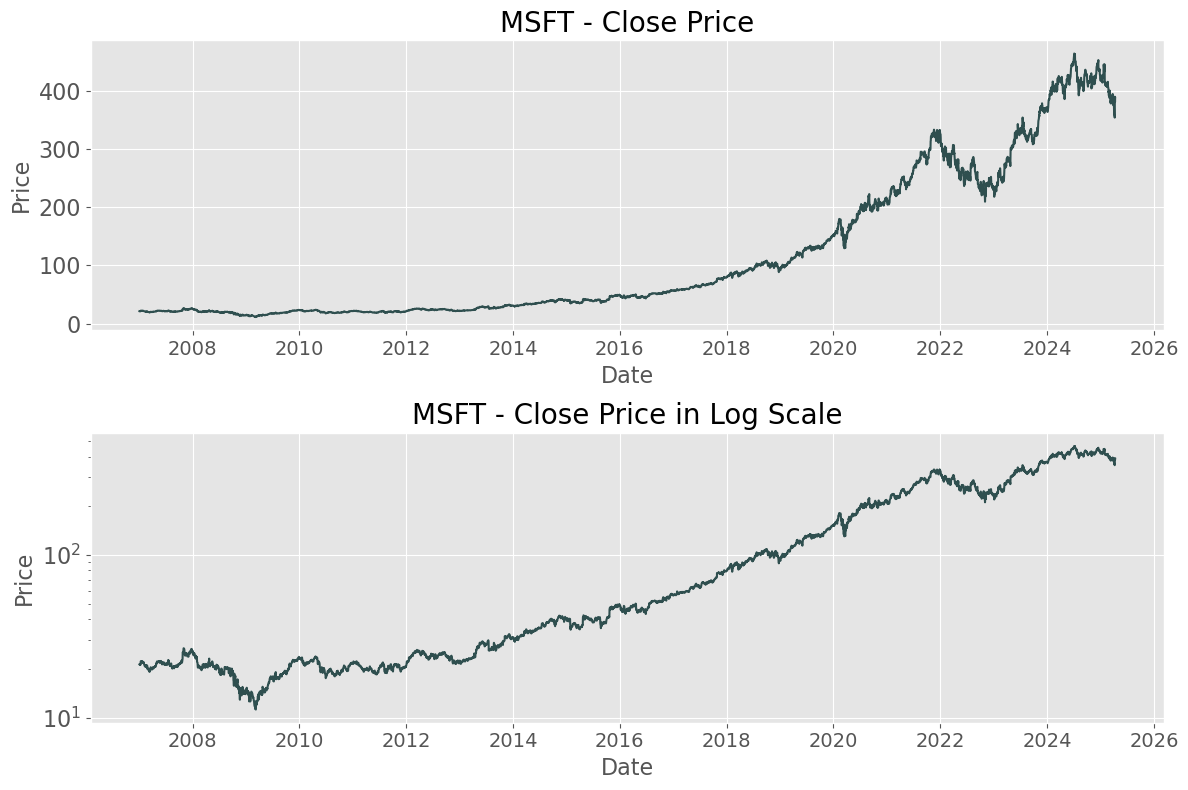

In [6]:
import matplotlib.pyplot as plt
from finance import historical_price

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

historical_price(ticker, start="2007", column="Close", scale='linear', ax=axes[0])
historical_price(ticker, start="2007", column="Close", scale='log', ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()


## Dividends

> *"Do you know the only thing that gives me pleasure? It's to see my dividends coming in."*  
> 
> *John D. Rockefeller, 1901*

I don't think Microsoft is famous for its dividends. But they are paying dividends. The dividend yield is around 0.8% which is not much. But the dividend growth rate is 10% per year. 

Problem with dividends in Microsoft is that the stock price is so high that the dividend yield is low. 

In [7]:
from finance import annual_dividends

df_dividends = annual_dividends(facts)
df_dividends[0].tail(5)

,date,dividends,year
12,2020-06-30,15137000000,2020
13,2021-06-30,16521000000,2021
14,2022-06-30,18135000000,2022
15,2023-06-30,19800000000,2023
16,2024-06-30,21771000000,2024


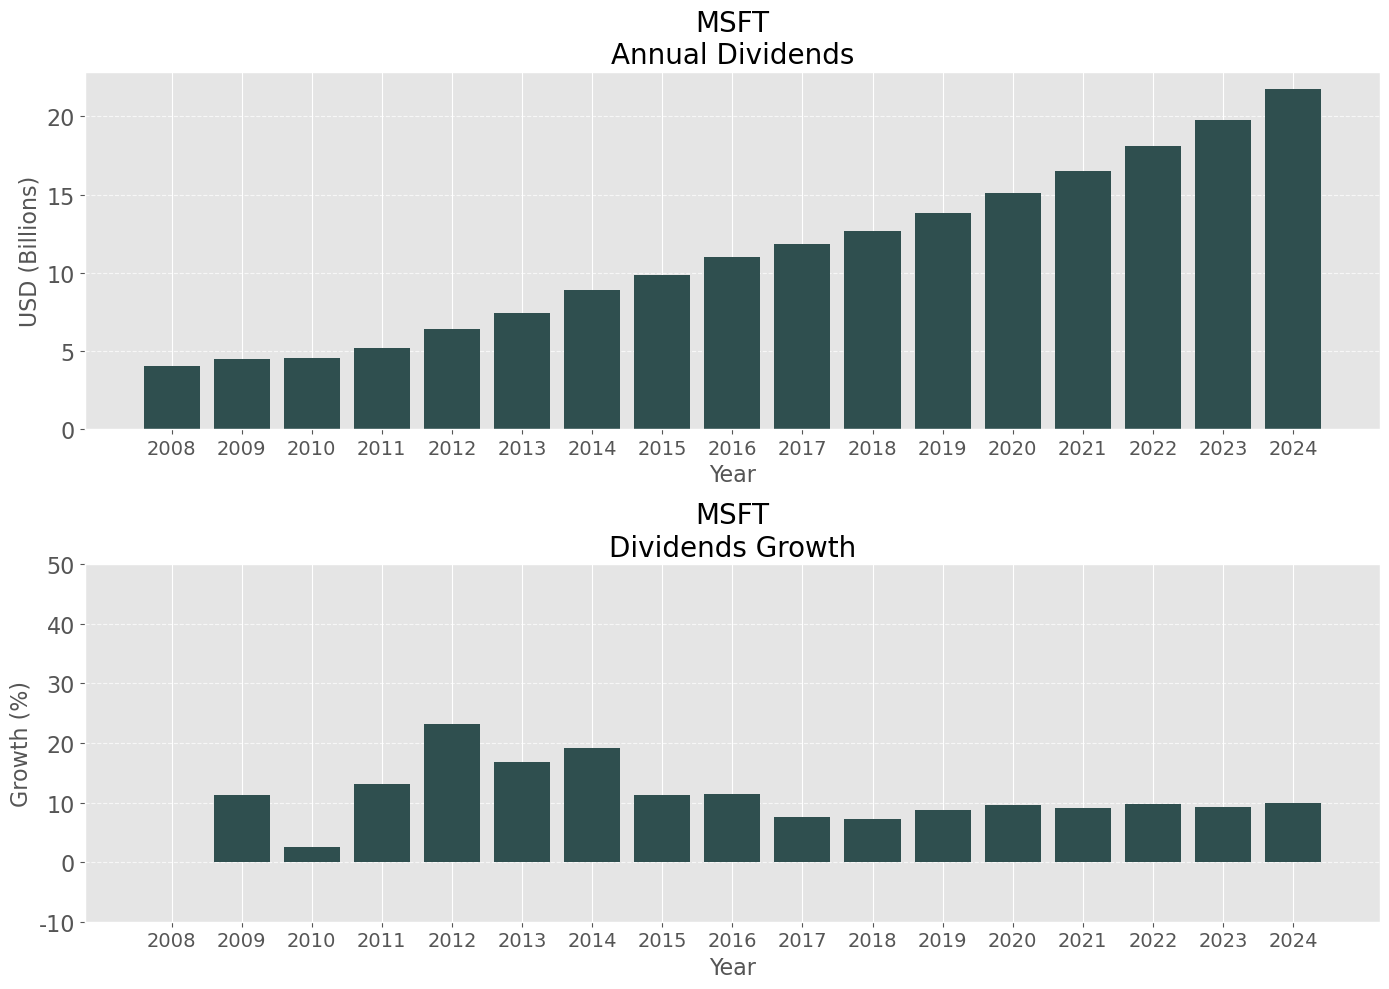

In [8]:
from finance import plot_annual_dividends, plot_dividends_growth

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_dividends(df_dividends[0], ticker=ticker, unit='B', ax=axes[0])
plot_dividends_growth(df_dividends[0], ticker=ticker, ymin=-10, ymax=50, ystep=10, ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

## P/E Ratio

P/E ratio of Microsoft goes up as the stock price goes up. Fast growth of the net income could not keep up with the stock price growth. The P/E ratio arguably too high, but it is not a problem for Microsoft. The company is growing fast and the P/E ratio is not too high compared to other companies in the same industry. 

In [10]:
price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share
pe = (market_cap.iloc[-1] / df_net_income[0].net_income.iloc[-1]).iloc[0]

print(f"Latest P/E Ratio for {ticker}: {pe:.2f}")

[*********************100%***********************]  1 of 1 completed


Latest P/E Ratio for MSFT: 32.76


[*********************100%***********************]  1 of 1 completed


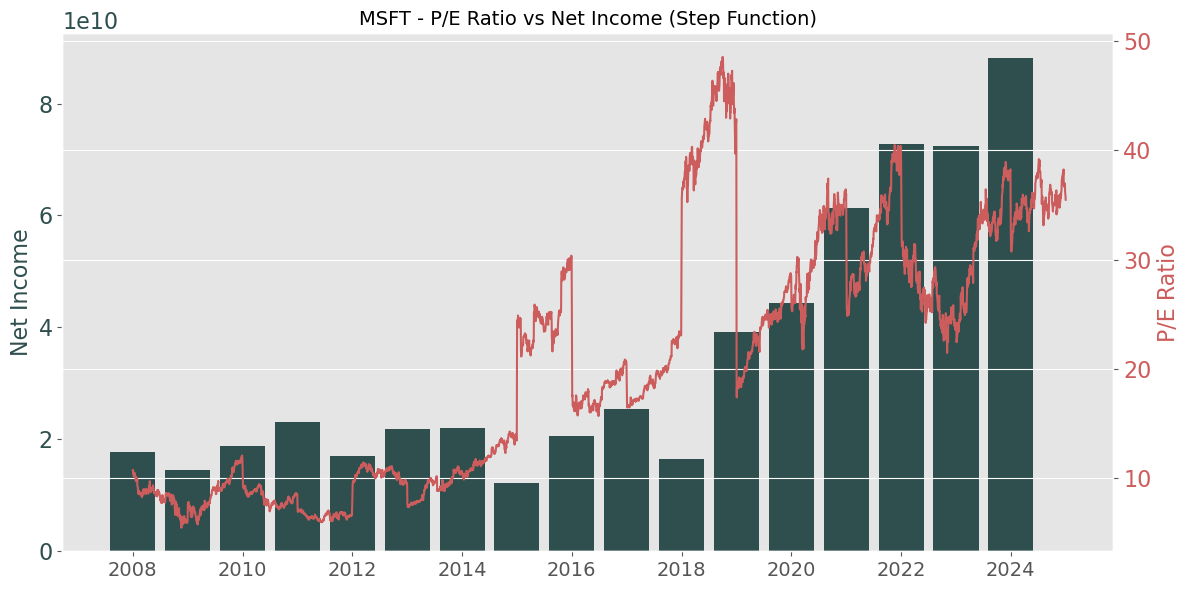

In [11]:
import yfinance as yf

price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share

df = df_net_income[0].copy()
df = df[df['year'] >= market_cap.index.min().year]
df['effective_date'] = pd.to_datetime(df['year'], format='%Y')  # Jan 1 of next year

# Daily P/E Ratio using step function for annual income
step_dates = pd.to_datetime(df['date'])
step_income = df.set_index('date')['net_income']

# Create step series aligned with price_df
pe_df = market_cap.copy()
pe_df['year'] = pe_df.index.year
pe_df['net_income'] = pe_df['year'].map(df.set_index('year')['net_income'])
pe_df['pe'] = pe_df[ticker] / pe_df['net_income']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Net Income (right y-axis)
ax1.bar(df['effective_date'], df['net_income'], width=300, color='darkslategray')
ax1.set_ylabel('Net Income', color='darkslategray')
ax1.tick_params(axis='y', labelcolor='darkslategray')
ax1.grid(False)

# P/E Ratio (left y-axis)
ax2 = ax1.twinx()
ax2.plot(pe_df.index, pe_df['pe'], color='indianred', label='P/E Ratio')
ax2.set_ylabel('P/E Ratio', color='indianred')
ax2.tick_params(axis='y', labelcolor='indianred')

# Title and x-label
plt.title(f'{ticker} - P/E Ratio vs Net Income (Step Function)', fontsize=14)
ax2.set_xlabel('Date')

plt.tight_layout()
plt.show()

## Conclusion

I love the growth of net income. But the stock price is not cheap. The P/E ratio is little bit high at the moment. But I think Microsoft is a good company to invest in. I would not buy it now, but I would keep an eye on it.